In [31]:
!pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 1.3/56.8 MB 4.3 MB/s eta 0:00:13
   - -------------------------------------- 2.4/56.8 MB 4.5 MB/s eta 0:00:13
   -- ------------------------------------- 3.4/56.8 MB 4.8 MB/s eta 0:00:12
   --- ------------------------------------ 4.5/56.8 MB 4.8 MB/s eta 0:00:11
   --- ------------------------------------ 5.5/56.8 MB 5.0 MB/s eta 0:00:11
   ---- ----------------------------------- 6.6/56.8 MB 4.8 MB/s eta 0:00:11
   ----- ---------------------------------- 7.3/56.8 MB 4.9 MB/s eta 0:00:11
   ----- ---------------------------------- 8.4/56.8 MB 4.7 MB/s eta 0:00:11
   ------ --------------------------------- 9.2/56.8 MB 4.7 MB/s eta 0:00:11
   ------ --------------------------------- 9.7/56.8 MB 4.3 MB/s eta 0:00:11
   ------- -------------------------------- 10.5/56.8 MB 4.3 MB/s eta 0:00:11
   ------- -


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd


In [ ]:
#VERİYİ YÜKLE

In [15]:
train = pd.read_csv("data/train.csv")
test  = pd.read_csv("data/test.csv")

print(train.shape, test.shape)
print(train.columns.tolist()[:12])  # ilk sütunları gör

train.head(5)

(10886, 12) (6493, 9)
['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
#EDA KEŞİFÇİ VERİ ANALİZİ

In [14]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Kolon isimleri ve veri tipleri
print("\nSütunlar ve veri tipleri:")
print(train.dtypes)

# İlk birkaç satır
print("\nİlk 5 satır (train):")
print(train.head())

# Eksik değer analizi
print("\nEksik değer sayısı (train):")
print(train.isnull().sum())

Train shape: (10886, 12)
Test shape: (6493, 9)

Sütunlar ve veri tipleri:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

İlk 5 satır (train):
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2

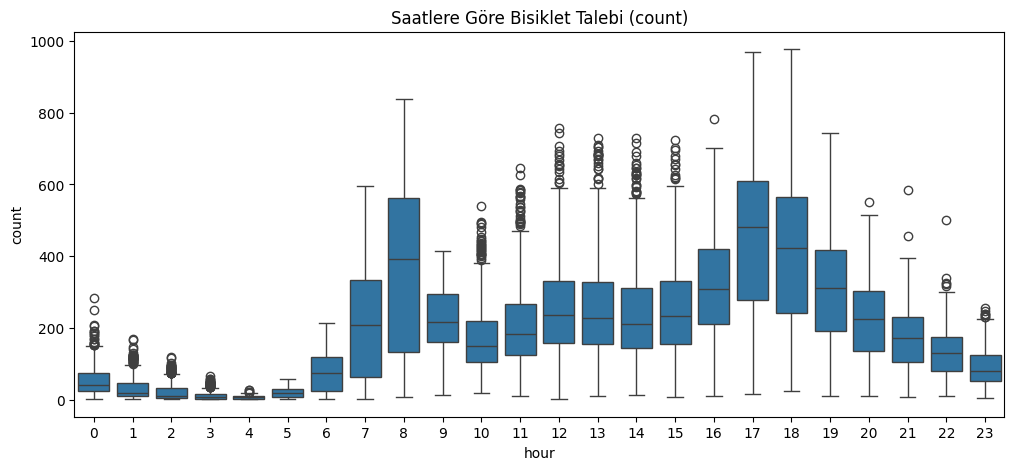

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# datetime'i parçalara ayır
train['datetime'] = pd.to_datetime(train['datetime'])
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday  # 0=Monday
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year

# Saat bazında talep dağılımı
plt.figure(figsize=(12,5))
sns.boxplot(x='hour', y='count', data=train)
plt.title("Saatlere Göre Bisiklet Talebi (count)")
plt.show()


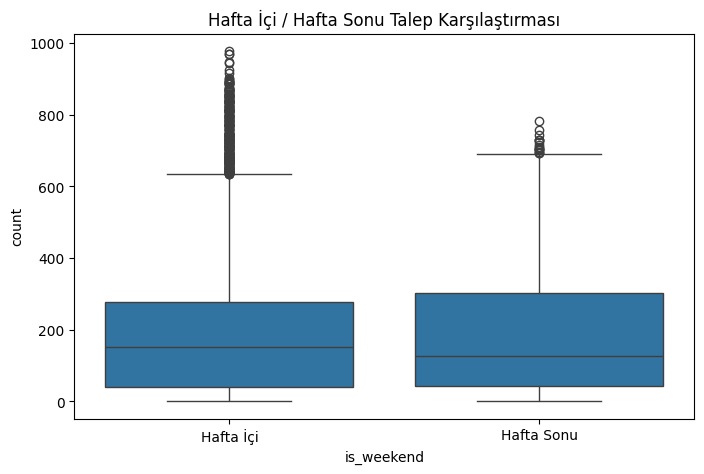

In [18]:
# Hafta içi (0-4), hafta sonu (5-6)
train['is_weekend'] = train['weekday'].apply(lambda x: 1 if x >= 5 else 0)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='is_weekend', y='count', data=train)
plt.xticks([0, 1], ['Hafta İçi', 'Hafta Sonu'])
plt.title("Hafta İçi / Hafta Sonu Talep Karşılaştırması")
plt.show()


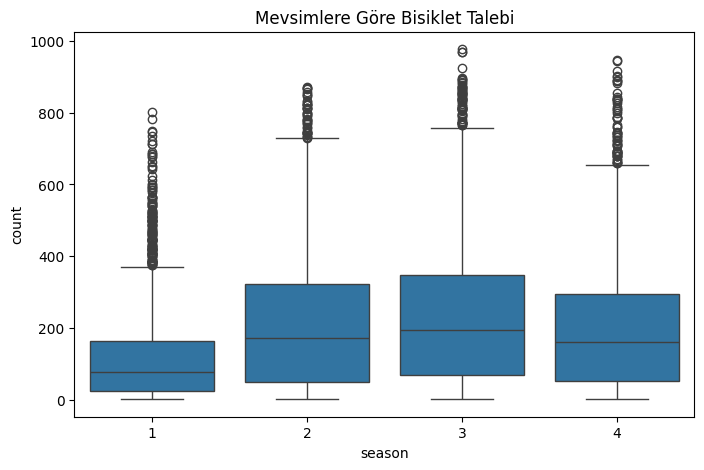

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='count', data=train)
plt.title("Mevsimlere Göre Bisiklet Talebi")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Özellikler ve hedef
features = ['season','holiday','workingday','weather',
            'temp','atemp','humidity','windspeed',
            'hour','weekday','month','year']
X = train[features]
y = train['count']

# Kategorik ve sayısal sütun listesi
cat_cols = ['season','holiday','workingday','weather',
            'hour','weekday','month','year']
num_cols = ['temp','atemp','humidity','windspeed']

# Ön işlem adımı
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# Train-test ayırma
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Pipeline: Ön işlem + Linear Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Modeli eğit
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_val)

# Negatif tahminleri sıfıra çekiyoruz (RMSLE için gerekli)
y_pred = np.where(y_pred < 0, 0, y_pred)

# RMSLE (yarışma metriği)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print(f"Validation RMSLE: {rmsle:.4f}")


Validation RMSLE: 1.0912


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_val)
rf_pred = np.where(rf_pred < 0, 0, rf_pred)

rf_rmsle = np.sqrt(mean_squared_log_error(y_val, rf_pred))
print(f"Validation RMSLE (Random Forest): {rf_rmsle:.4f}")


Validation RMSLE (Random Forest): 0.4640


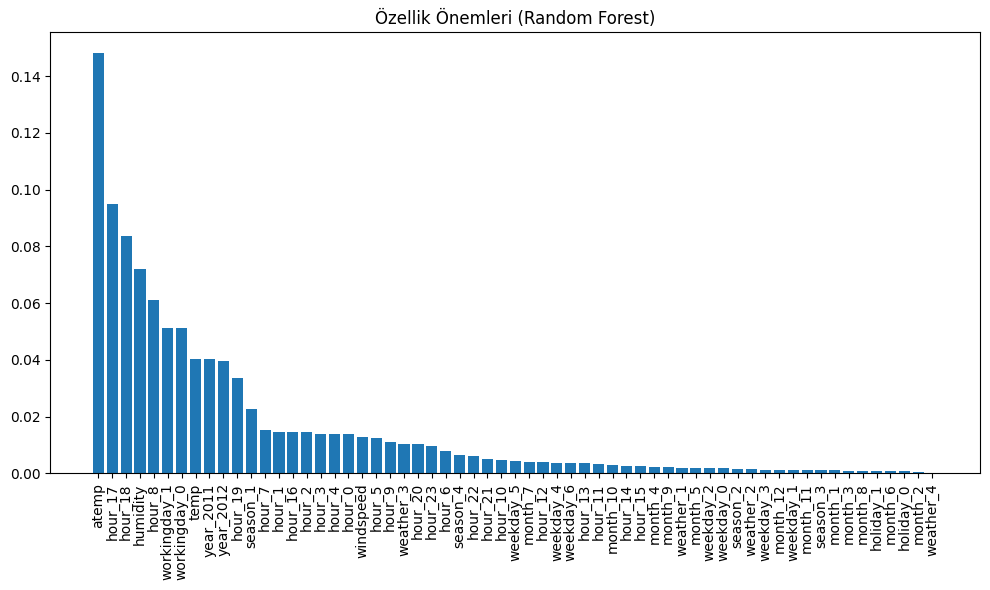

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Random Forest modelinden özellik önemlerini al
feature_names = rf_model.named_steps['preprocessor'].transformers_[0][1] \
    .get_feature_names_out(cat_cols).tolist() + num_cols

importances = rf_model.named_steps['regressor'].feature_importances_

# Önem değerlerini büyükten küçüğe sırala
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Özellik Önemleri (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_log_error
import numpy as np
import pandas as pd

# --- 1) RMSLE scorer ---
def rmsle(y_true, y_pred):
    y_pred = np.maximum(y_pred, 0)          # log için negatif tahminleri sıfıra çek
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# --- 2) Zaman-duyarlı CV (veriyi zaman sırasına göre sırala) ---
# train DataFrame'inde datetime zaten var
train_sorted = train.sort_values('datetime').reset_index(drop=True)

features = ['season','holiday','workingday','weather',
            'temp','atemp','humidity','windspeed',
            'hour','weekday','month','year']
X_all = train_sorted[features]
y_all = train_sorted['count']

tscv = TimeSeriesSplit(n_splits=3)

# --- 3) Pipeline: preprocessor + RF ---
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf)
])

# --- 4) Parametre ızgarası (DIKKAT: regressor__ öneki) ---
param_grid = {
    'regressor__n_estimators': [200, 400],
    'regressor__max_depth': [12, 16, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 3],
    'regressor__max_features': ['sqrt', 'log2']
}

# --- 5) GridSearchCV ---
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=tscv,
    scoring=rmsle_scorer,   # yarışma metriği
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_all, y_all)

print("En iyi parametreler:", grid_search.best_params_)
print("CV (best) RMSLE:", -grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
En iyi parametreler: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 400}
CV (best) RMSLE: 0.8173672818466396


In [26]:
# En iyi parametrelerle yeniden model kur
best_rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)

final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_rf)
])

# Eğitim verisini yeniden kullan
final_model.fit(X_train, y_train)

# Tahmin
y_val_pred = final_model.predict(X_val)
y_val_pred = np.maximum(y_val_pred, 0)

# Skor
val_rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
print(f"Validation RMSLE (Tuned Random Forest): {val_rmsle:.4f}")


Validation RMSLE (Tuned Random Forest): 0.7260


In [28]:
import numpy as np
import pandas as pd

# test veri setinde datetime'ı parçalayalım
test['datetime'] = pd.to_datetime(test['datetime'])
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year


def add_features(df):
    df['hour_workingday'] = df['hour'].astype(str) + "_" + df['workingday'].astype(str)

    df['temp_bin'] = pd.cut(df['temp'], bins=[-10, 10, 20, 30, 50],
                            labels=['very_cold', 'mild', 'warm', 'hot'])

    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

    df['is_rush_hour'] = df['hour'].isin([7,8,9,17,18,19]).astype(int)
    df['is_night'] = df['hour'].isin([0,1,2,3,4,5]).astype(int)
    df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)

    return df

# Eğitim ve test setine uygula
train = add_features(train)
test = add_features(test)


In [29]:
test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,weekday,month,year,hour_workingday,temp_bin,hour_sin,hour_cos,is_rush_hour,is_night,is_weekend
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,2011,0_1,mild,0.000000,1.000000,0,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,2011,1_1,mild,0.258819,0.965926,0,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,2011,2_1,mild,0.500000,0.866025,0,1,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,2011,3_1,mild,0.707107,0.707107,0,1,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,2011,4_1,mild,0.866025,0.500000,0,1,0


In [32]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
import numpy as np

# Özellik ve hedef
used_features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                 'humidity', 'windspeed', 'hour', 'weekday', 'month', 'year',
                 'hour_workingday', 'temp_bin', 'hour_sin', 'hour_cos',
                 'is_rush_hour', 'is_night', 'is_weekend']

X = train[used_features]
y = train['count']

# Eğitim/val ayır
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Kategorik ve sayısal sütunları belirle
categorical_cols = ['season', 'holiday', 'workingday', 'weather',
                    'hour', 'weekday', 'month', 'year',
                    'hour_workingday', 'temp_bin']
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed',
                'hour_sin', 'hour_cos', 'is_rush_hour', 'is_night', 'is_weekend']

# Ön işlem pipeline'ı
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])

# XGBoost modeli
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Tam pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

# Eğit
pipeline.fit(X_train, y_train)

# Tahmin
y_pred = pipeline.predict(X_val)
y_pred = np.maximum(y_pred, 0)

# RMSLE skoru
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print(f"XGBoost Validation RMSLE: {rmsle:.4f}")


XGBoost Validation RMSLE: 0.4368


In [33]:
from sklearn.compose import TransformedTargetRegressor

xgb_transformed = TransformedTargetRegressor(
    regressor=pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)

xgb_transformed.fit(X_train, y_train)
y_pred = xgb_transformed.predict(X_val)
y_pred = np.maximum(y_pred, 0)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print(f"XGBoost + log1p RMSLE: {rmsle:.4f}")


XGBoost + log1p RMSLE: 0.2878
